<center>

# EECE 231 - Intr. to Programming & Comp. with Applications

# Fall 2021-2022

## Quiz - II
  
</center>

* **Place your AUB photo ID** on your desk.

* You have **2 hours and 30 minutes** to complete the exam.

* There are **5 problems** on this exam. The problems are **not in order of difficulty**. Please read fully the problems before starting.

* Next to each problem you find our estimate on how many minutes it should take you to solve it.

* For each problem, you may describe at the beginning of your program –appropriately commented out– the main idea of your solution. A description of how you break the problem into various pieces is for example valuable. Be sure to use comments to explain what you are doing. A program that does not run may be worth significant partial credit if your algorithm is correct and your ideas are sensible.

* The exam is **closed book**, except for what was provided to you on the desktop.

* **Use of cell-phones is NOT allowed.**

* If you violate the above rules or if you communicate with a person other than the exam proctors during the exam, you will immediately get zero and you will be referred to the appropriate disciplinary committee.

## Problem 1 (30 min)

Given a list of strings `L`, and a string `inStr`, we want to search `L` for two strings `str1` and `str2` such that their concatenation is equal to `inStr` (i.e., the characters in `str1` followed by those in `str2` will form `inStr`). If these two strings are found in `L`, the function should return a tuple of their ordered indices; otherwise, if they are not found, the function should return None (see the sample input-outputs below).


<center>
    <img src = "StringSearch.png", width ="600">
</center>


Assume that `L` is of size $n$ (i.e., includes $n$ strings), we want to write three versions of the solution with different complexities in terms of $n$. Here, the complexity analysis only depends on the size of `L`, and is independent of the size of the strings. In other words, you can assume that the `inStr` and the individual strings in `L` are small so that any string operations (e.g., iterating over the characters in `inStr`) are assumed to be done in constant time. 

#### (a) Version 1

Write the function `strSearchV1(L, inStr)`, which searches for `str1` and `str2` as described above by taking all pairs of strings in `L`, concatenating them, and checking if the result is equal to the `inStr`. Your solution should be done in $O(n^2)$ time. 

*Note: the returned indices don’t have to be distinct, i.e., $(i,i)$ is a valid answer if the string at index $i$ concatenated with itself gives the* `inStr`.

In [2]:
# Problem 1 - (a) Solutions

def strSearchV1(L, inStr):
    for i, str1 in enumerate(L):
        for j, str2 in enumerate(L):
            if str1 + str2 == inStr:
                return (i,j)

#### (b) Version 2

Write the function `strSearchV2(L, inStr)`, which solves the same problem but in $O(n \log n)$ time. You can achieve this by using a sorted copy of `L`, and then for each `str1` in `L`, use binary search to find the complement `str2`. Note that the list `L` should not be modified, and the returned tuple should hold the indices relevant to the original unordered `L` (i.e., not relevant to the sorted copy); thus, the output of `strSearchV2` should match that of `strSearchV1`.

In [3]:
# Problem 1 - (b) Solutions

def binary_search(L,target): #assumes L is sorted
    lower=0            
    upper=len(L)-1
    while lower<=upper:
        mid = (lower+upper)//2
        if L[mid]==target:  
            return mid
        if target<L[mid]:
            upper = mid-1
        else:
            lower=mid+1
            
def strSearchV2(L, inStr):
    L2 = sorted(L) 
    
    for i, str1 in enumerate(L2):  
        s_len = len(str1)
        if str1 == inStr[:s_len]:
            str2 = inStr[s_len:] 
            idx = binary_search(L2,str2)   
            if idx is not None:
                # search for str1 and str2 in L
                # We can use our own linear search function/logic or simply use the built-in list.index method
                return (L.index(str1), L.index(str2)) # L.index is a linear time operation

#### (c) Version 3

In `strSearchV3(L, inStr)`, use a dictionary to solve the same problem in linear expected time.

In [4]:
# Problem 1 - (c) Solutions


def strSearchV3(L, inStr): 
    d = {} 
    for i, s in enumerate(L):
        d[s] = i
        
    for j, str1 in enumerate(L):
        s_len = len(str1)
        if str1 == inStr[:s_len]:  # if str1 in input_str
            str2 = inStr[s_len:] 
            if str2 in d:
                idx = d[str2]
                return(j,idx)
        
L = ['head','shoulders ','knees and ','toes!']
print(strSearchV1(L,'knees and toes!'))
print(strSearchV2(L,'knees and toes!'))
print(strSearchV3(L,'knees and toes!'))
print(' ')

L = ['hi ','there']
print(strSearchV1(L,'hi there'))
print(strSearchV2(L,'hi there'))
print(strSearchV3(L,'hi there'))
print(' ')

L = ['there','hi ']
print(strSearchV1(L,'hi there'))
print(strSearchV2(L,'hi there'))
print(strSearchV3(L,'hi there'))
print(' ')

L = ['hi','there'] #No space after 'hi' 
print(strSearchV1(L,'hi there'))
print(strSearchV2(L,'hi there'))
print(strSearchV3(L,'hi there'))
print(' ')      
        
L = ['kn','h','shoulders ','ees and toes!']
print(strSearchV1(L,'knees and toes!'))
print(strSearchV2(L,'knees and toes!'))
print(strSearchV3(L,'knees and toes!'))    
 
print(' ')           
L = []
print(strSearchV1(L,'knees and toes!'))
print(strSearchV2(L,'knees and toes!'))
print(strSearchV3(L,'knees and toes!'))               

(2, 3)
(2, 3)
(2, 3)
 
(0, 1)
(0, 1)
(0, 1)
 
(1, 0)
(1, 0)
(1, 0)
 
None
None
None
 
(0, 3)
(0, 3)
(0, 3)
 
None
None
None


## Problem 2 (30 min)

#### Part (a):

Write a **recursive** function `ListMinimum(A)` that uses a *divide and conquer* approach to find the minimum element of a list A.

In [5]:
# Problem 2 (a) - Solutions

def ListMinimum(A):
    # returns the index of the min element
    n = len(A)
    if n == 0:
        return None
    elif n == 1:
        return 0
    else:
        mn1 = ListMinimum(A[:n//2])
        mn2 = ListMinimum(A[n//2:n])
        if A[mn1] < A[mn2 + n//2]:
            return mn1
        else: 
            return mn2 + n//2
def LM(A,start,end):
    
    if start==end:
        return start
    else:
        m=(start+end)//2
        mn1 = LM(A,start,m)
        mn2 = LM(A,m+1,end)
        if A[mn1] < A[mn2]:
            return mn1
        else: 
            return mn2 
 
L = [3, -1, 6, -8, 4, 2, 0, 4]
print(ListMinimum(L))
print(LM(L,0,len(L)-1))

3
3


#### Part (b): 

Analyze the running time of your solution and write below the recurrence for the worst case running time of your algorithm on a size-$n$ list. Using asymptotic notation, specify the solution of this recurrence.

Problem 2 (b) - Solutions

In what is presented in (a), the problem is divided into two, one of size $n$//2 and one of size ($n$ - $n$//2). After conquering each problem, the "combine" time is constant. Hence

$$
T(n) = T \left( \lfloor \frac{n}{2} \rfloor \right) + T \left( \lceil \frac{n}{2} \rceil \right) + c
$$

which is simplified to 

$$
T(n) = 2 T(n/2) + c
$$

Applying the Master Thorem, $log_b (a) = 1$ and the solution is $T(n) = \Theta(n)$

#### Part (c): 

Write the **recursive** function `powerSet` that takes a set of **unique** numbers, represented as a list **L** and returns all the subsets (including empty), in no particular order,  of **L**.

Example: on input L=[1,'a',3], `powerSet(L)` returns 

[[],[1],['a'],[1,'a'],[3],[1,3],['a',3],[1,'a',3]]

In [12]:
# Problem 2 (c) - Solutions

def powerSet(nums):
    if len(nums) == 0:
        return [[]]
    smaller = powerSet(nums[:-1])
    smallerPlus = smaller.copy()
    for i in range(len(smallerPlus)):
        smallerPlus[i] = smallerPlus[i]+[nums[-1]]
    return smaller+smallerPlus

a=powerSet([1,'a',3])
a

[[], [1], ['a'], [1, 'a'], [3], [1, 3], ['a', 3], [1, 'a', 3]]

## Problem 3 (30 min)

#### Part (a):

Consider the sequence: ${\displaystyle a_{0},a_{1},a_{2}\dots }$ defined as:

$${\displaystyle a_{n}={\begin{cases}0&&{\text{if }}n=0\\a_{n-1}+n&&{\text{otherwise}}\end{cases}}}$$

The first terms of the sequence are: 0, 1, 3, 6, 10, 15, ...

Write the **recursive** function `mySeries(n)` that computes $a_n$.

In [16]:
# Problem 3 (a) - Solutions

def mySeries(n):
    assert n >= 0, 'The input argument should be non-negative'
    if n == 0:
        return 0
    else:
        return n + mySeries(n-1)
    
mySeries(3)

6

#### Part (b):

Quoting *Wikipedia*: The Recaman sequence: ${\displaystyle a_{0},a_{1},a_{2}\dots }$ is defined as:

$${\displaystyle a_{n}={\begin{cases}0&&{\text{if }}n=0\\a_{n-1}-n&&{\text{if }}(a_{n-1}-n)>0{\text{ and is not already in the sequence}}\\a_{n-1}+n&&{\text{otherwise}}\end{cases}}}$$

The first terms of the sequence are: 0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9, 24 ...

Write an efficient function `Recaman(n)` that computes and returns all sequence values upto $a_n$. 

Additionally, **plot** the values: $a_0, \cdots, a_{100}$ and make sure you label you axes and provide a title to your plot.

[0, 1, 3, 6, 2, 7, 13, 20, 12, 21, 11, 22, 10, 23, 9, 24]


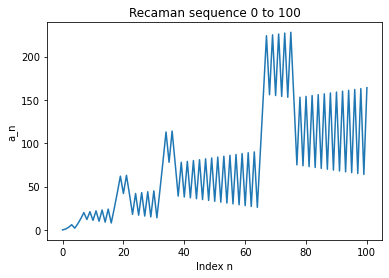

In [34]:
# Problem 3 (b) - Solutions

def Recaman(n):
    assert n >= 0, 'The input argument should be non-negative'
    L = [0]*(n+1)
    for j in range(1,n+1):
        tmp = L[j-1] - j
        if (tmp not in L) and (tmp > 0):
            L[j] = tmp
        else:
            L[j] = L[j-1] + j
    return L

L = Recaman(15)
print(L)

import matplotlib.pyplot as plt
L = Recaman(100)
plt.plot(L)
plt.xlabel('Index n')
plt.ylabel('a_n')
plt.title('Recaman sequence 0 to 100')
plt.show()

#### Part (c) (Bonus)

Write the function `checkRecaman(k)` that returns `True` if $k$ appears in the Recaman sequence and `False` otherwise.

In [ ]:
# Problem 3 (c) - Solutions

# It is believed that all numbers will eventually appear in a Recaman sequence. 
# This is an unproven statement (An open problem) which means that the function checkRecaman is 
# probably not feasible. Will keep an eye on your solution to see if you have indirectly contributed 
# to the solution to an open problem.
#
# In these solutions, we check for example whether "k" appears in the sequence up to n

def checkRecaman(k,n):
    L = Recaman(n)
    if k in L:
        return True
    return False

checkRecaman(254,100)

## Problem 4 (30 min)

#### Part (a): 

In his efforts to detect cheating, the instructor decides the following: Two solutions s1 and s2 are deemed **identical if s2 can be formed by permuting characters of s1**.

For example:
```python
a = 0
a += 1
return a*a
```

and
```python
b = 0
b += 1
return b*b
```

are deemed identical and the second solution (string) is the first where `a` is replaced by `b` (you can think that `a` and `b` are permuted.)

Write a function `isSame(s1,s2)`, which given two solutions (i.e., strings) s1 and s2, returns `True` if they are identical (as per the definition above), and `False` otherwise.

*Note: Full grade is give to O(n1 + n2) (expected) time solutions*

In [4]:
# Problem 4 (a) - Solutions

def chCount(st):
    dict = {}
    for j in st:
        if j in dict:
            dict[j] += 1
        else:
            dict[j] = 1
    return dict

D = chCount('bases')
print(D)

def counts(d):
    dd = {}
    for k in d:
        if d[k] in dd:
            dd[d[k]] += 1
        else:
            dd[d[k]] = 1
    return dd

DD = counts(D)
print(DD)

def isSame(s1, s2):
    d1 = chCount(s1)
    d2 = chCount(s2)
    dd1 = counts(d1)
    dd2 = counts(d2)
    if dd1 == dd2:
        return True
    else:
        return False

isSame('return a+1', 'return b+1')

{'b': 1, 'a': 1, 's': 2, 'e': 1}
{1: 3, 2: 1}


True

#### Part (b):

Noticing that this tester produces identical results for codes such as 
```python
a = 0 
```

and
```python
b > 1
```

which are clearly different, help the instructor fine tune his method by improving the code in **(a)**. 

In [1]:
# Problem 4 (b) - Solutions

# One can elminiate operators; numbers such as integers from the decision mechanism
def chCount(st):
    dict = {}
    for j in st:
        try:
            int(j)
        except ValueError:
            t = ((j == '=') or (j == '>') or (j =='<') or (j == '+') or (j == '-') or (j == ' '))
            if t == False:
                if j in dict:
                    dict[j] += 1
                else:
                    dict[j] = 1
    return dict

D = chCount('bases += 1')
print(D)

{'b': 1, 'a': 1, 's': 2, 'e': 1}


## Problem 5 (30 min)

In this problem we would like to implement a *Linked Sequence* (LS) data structure. A `LS` is a sequence of `Node`s connected to each other. Each `Node` has two components: a value and a `Node` next to it. 

For example, the `LS`: 

$\qquad$ 3 -> 2 -> 7 

has three `Node`s: 
* the first one has value 3 and its next `Node` is the one with value 2, 
* the `Node` with value 2; its next is the node with value 7,
* the `Node` with value 7 has NO next, (i.e. None).

1. Write a class `Node` that has two member elements
    - `val` denoting an integer value
    - `next` is a reference to the `Node` next to (to the right of) it


2. Write a class `LS`:
    - Has a **start** and **end** `Node`. In the example above, the start `Node` is the one with value 3 and the end `Node` the one with value 7 (for an empty `LS` or a list with one `Node` **start**=**end**)
    - Write method `append` that takes a number as a parameter and appends to the list a `Node` with that value
    - Write the appropriate method to allow us to print the values of the `LS` in order. 
    
    Example:
    ```python
    a = LL()
    a.append(3)
    a.append(7)
    print(a)
    [3, 7]
    ```
    
3. Write the appropriate method to concatenate two `LS` lists (through the add operator)
```python
b = LL(999)
b.append(333)
c = a+b
print(c)
[3, 7, 999, 333]
```

In [ ]:
# Problem 5 - Solutions


class Node:
    def __init__(self, val, next=None):
        self.val, self.next = val, next
    def __str__(self):
        return str(self.val)

class LS:
    def __init__(self, val=None):
        if val != None:
            self.start = Node(val)
            self.end   = self.start
        else:
            self.start = self.end = None

    def append(self, val):
        n = Node(val)

        if self.start == None:
            self.start = n
            self.end   = n
        else:
            self.end.next = n
            self.end = n
   ...:
    def __add__(self, other):
        new  = LS()
        node = self.start
        while node != None:
            new.append(node.val)
            node = node.next
        node = other.start
        while node != None:
            new.append(node.val)
            node = node.next

        return new

    def __str__(self):
        n = self.start
        s = ""
        while n!= None:
            s = s+str(n.val)
            n = n.next
            if n != None:
                s = s+","
        return "["+s+"]"


a = LS(1)
a.append(18)
print(a)
b = LS()
b.append(10)
print(b)
c = a+b
a.append(33)
print(a)
print(c)